##### Import Libraries

In [163]:
import pandas as pd
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns

co1or = sns.color_palette()
%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 99

In [164]:
data = pd.read_csv("train_loan_pred.csv")
map1 = {'Y' : 1, 'N' : 0}
data.Loan_Status = data.Loan_Status.map(map1)

##### Feature analysis

In [165]:
missing_df = data.isnull().sum(axis = 0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df["missing_ratio"] = missing_df["missing_count"]/missing_df.shape[0]
missing_df = missing_df.sort_values(by = 'missing_count')
missing_df

,column_name,missing_count,missing_ratio
2,Married,3,0.428571
1,Gender,13,1.857143
9,Loan_Amount_Term,14,2.000000
3,Dependents,15,2.142857
8,LoanAmount,22,3.142857
5,Self_Employed,32,4.571429
10,Credit_History,50,7.142857


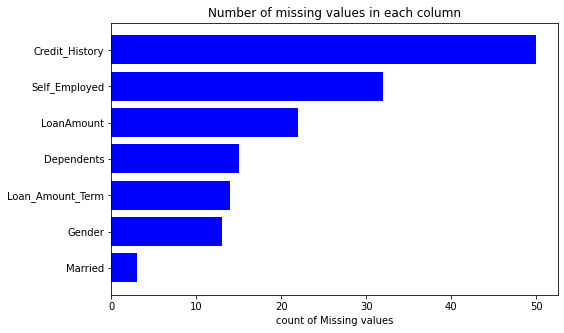

In [166]:
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (8,5))
rects = ax.barh(ind,missing_df.missing_count.values, color = 'blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation = 'horizontal')
ax.set_xlabel("count of Missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [167]:
dtype_df = data.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,Loan_ID,object
1,Gender,object
2,Married,object
3,Dependents,object
4,Education,object
5,Self_Employed,object
6,ApplicantIncome,int64
7,CoapplicantIncome,float64
8,LoanAmount,float64
9,Loan_Amount_Term,float64


In [168]:
dtype_df.groupby("Column Type").aggregate("count").reset_index()
data.describe(include = "float64")
data.select_dtypes("float64").nunique()

CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
dtype: int64

In [169]:
data.describe(include = "int64")
data.select_dtypes("int64").nunique()

ApplicantIncome    505
Loan_Status          2
dtype: int64

In [170]:
data.describe(include = "object")
data.select_dtypes ("object").nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
dtype: int64

In [208]:
categorical_ordinal_variable = data.drop(["Loan_Status","Loan_ID"], axis= 1).select_dtypes("object").columns.tolist()
categorical_ordinal_variable.extend(["Loan_Amount_Term", "Credit_History"])
categorical_ordinal_variable

dependent_variable = data[["Loan_Status"]].columns.tolist()
dependent_variable

numerical_variable = data.drop(list(chain(categorical_ordinal_variable ,  dependent_variable,["Loan_ID"])),axis = 1).columns.tolist()
numerical_variable

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

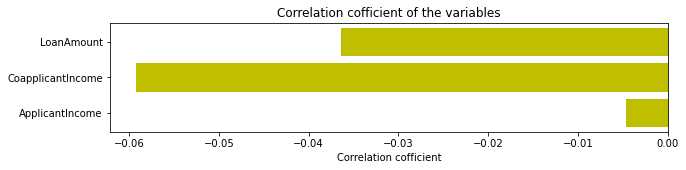

In [209]:
mean_values = data[numerical_variable].mean(axis = 0)
data_df_new = data.fillna(mean_values)
x_n_cols = [col for col in data.columns if col in numerical_variable]
x_n_cols
labels = []
values = []

for col in x_n_cols :
    labels.append(col)
    values.append(np.corrcoef(data_df_new[col].values, data_df_new["Loan_Status"].values)[0,1])
corr_df = pd.DataFrame({'cor_labels': labels, 'corr_values': values })
corr_df.sort_values(by = "corr_values")

ind = np.arange(corr_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (10,2))
rects = ax.barh(ind,np.array(corr_df.corr_values.values), color = 'y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.cor_labels.values, rotation = "horizontal")
ax.set_xlabel ("Correlation cofficient")
ax.set_title("Correlation cofficient of the variables")
plt.show()

In [210]:
for col in categorical_ordinal_variable:
    print(col, len(data_df_new[col].unique()))

Gender 3
Married 3
Dependents 5
Education 2
Self_Employed 3
Property_Area 3
Loan_Amount_Term 11
Credit_History 3


In [211]:
corr_sel_df = corr_df.loc[(corr_df["corr_values"] > 0.02) | (corr_df["corr_values"] < -0.01)]
corr_sel_df

,cor_labels,corr_values
1,CoapplicantIncome,-0.059187
2,LoanAmount,-0.036416


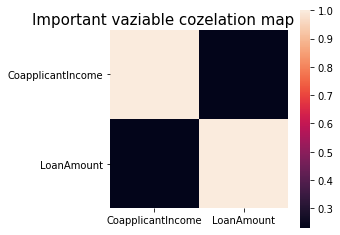

In [212]:
cols_to_use = corr_sel_df.cor_labels.tolist()
temp_df = data_df_new[cols_to_use]
corrmat = temp_df.corr(method = 'spearman')
f, ax = plt.subplots(figsize = (4,4))
# Draw Heat Map
sns.heatmap(corrmat,vmax = 1., square = True)
plt.title("Important vaziable cozelation map", fontsize = 15,position=(.3,1.1))
plt.show()


In [213]:
mode_values = data_df_new[categorical_ordinal_variable].mode(axis = 0).iloc[0]
data_df_new1 = data_df_new.fillna(mode_values)

In [214]:
data_df_new1.drop("Loan_ID",axis = 1,inplace = True)
data_df_new1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

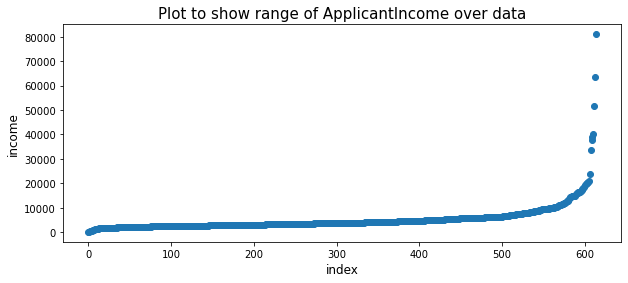

In [215]:
plt.figure(figsize=(10, 4))
plt.scatter(range(data_df_new1.shape[0]), np.sort(data_df_new1.ApplicantIncome.values))
plt.xlabel('index', fontsize = 12)
plt.ylabel('income', fontsize = 12)
plt.title("Plot to show range of Applicantlncome over data", fontsize = 15)
plt.show()

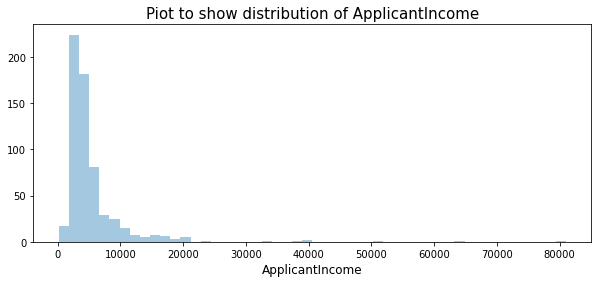

In [216]:
plt.figure(figsize=(10, 4))
sns.distplot(data_df_new.ApplicantIncome.values, bins=50, kde=False)
plt.xlabel( 'ApplicantIncome', fontsize=12)
plt.title("Piot to show distribution of ApplicantIncome", fontsize=15)
plt.show()

<Figure size 576x576 with 0 Axes>

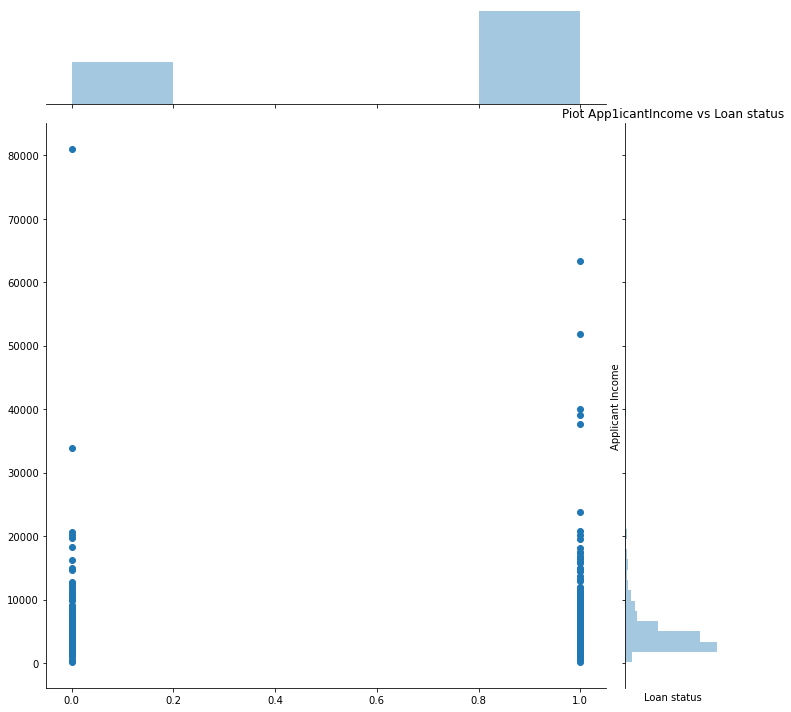

In [217]:
plt.figure(figsize=(8, 8))
sns.jointplot(x=data_df_new1.Loan_Status.values, y=data_df_new1.ApplicantIncome.values, size=10)
plt.ylabel('Applicant Income')
plt.xlabel('Loan status')
plt.title("Piot App1icantIncome vs Loan status")
plt.show()

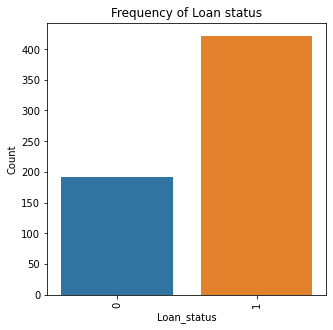

In [218]:
plt.figure(figsize=(5,5))
sns.countplot(x="Loan_Status", data=data_df_new1)
plt.ylabel('Count')
plt.xlabel('Loan_status')
plt.xticks(rotation = 'vertical')
plt.title("Frequency of Loan status")
plt.show()

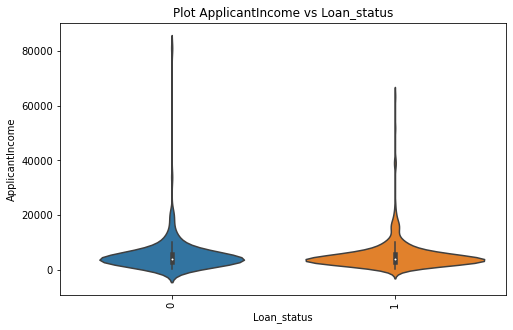

In [221]:
plt.figure(figsize = (8, 5))
sns.violinplot(x="Loan_Status", y="ApplicantIncome", data=data_df_new1)
plt.ylabel( 'ApplicantIncome')
plt.xlabel( 'Loan_status')
plt.xticks(rotation='vertical')
plt.title("Plot ApplicantIncome vs Loan_status")
plt.show()

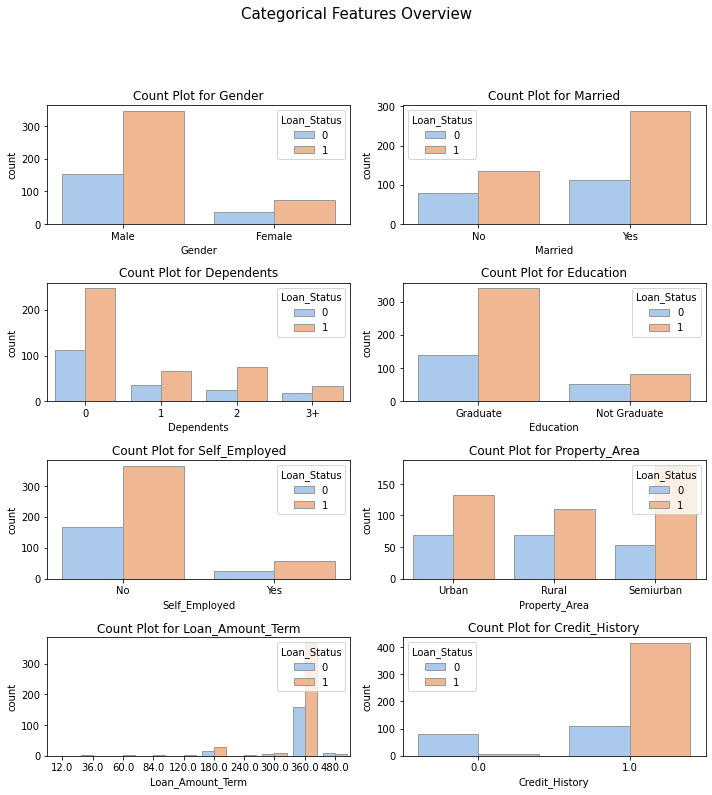

In [223]:
fig, axes = plt.subplots(4,2, figsize = (10,10))
fig.subplots_adjust(hspace=0.5)
for ax, name in zip(axes.flatten(), categorical_ordinal_variable) :
    sns.countplot(hue="Loan_Status", x=name, data=data_df_new1, ax=ax, palette="pastel", edgecolor=".6")
    ax.set_title(f"Count Plot for {name}")
fig.suptitle('Categorical Features Overview', position=(.5,1.1), fontsize=15)
fig.tight_layout()
fig.show()

In [224]:
x_data = data_df_new1.drop(['Loan_Status'],axis = 1)
y_data = data_df_new1 [ 'Loan_Status']
x_data.shape

In [225]:
#Loan_ID          614,  Gender             2, Married            2, Dependents         4, 
#Education          2, Self_Employed      2, Property_Area      3

(614, 11)

In [243]:
from sklearn.preprocessing import LabelEncoder
xp_data = pd.get_dummies(x_data, columns = ["Dependents","Property_Area"])
le = LabelEncoder()
for label in ['Gender','Married', 'Education','Self_Employed'] :
    xp_data[label] = le.fit_transform(x_data[label])
xp_data.shape

(614, 16)

#### Split training and test set

In [244]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(xp_data,y_data)

In [245]:
xp_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,1,0,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,1


In [246]:
from feature_selection import get_imp_features
selected_feature = get_imp_features(x_train,y_train, no_of_features = 10)

Fitting estimator with 16 features.
Fitting estimator with 12 features.


In [272]:
imp_features = selected_feature.loc[selected_feature['Total']>2].Feature

In [285]:
selected_feature

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,Married,True,True,True,True,True,True,6
2,Education,True,True,True,True,True,True,6
3,Credit_History,True,True,True,True,True,True,6
4,Property_Area_Semiurban,True,True,True,True,False,False,4
5,Property_Area_Rural,True,True,True,True,False,False,4
6,Dependents_1,True,True,True,True,False,False,4
7,CoapplicantIncome,True,True,False,False,True,True,4
8,Property_Area_Urban,False,True,True,True,False,False,3
9,LoanAmount,True,False,False,False,True,True,3
10,Dependents_2,True,True,True,False,False,False,3


In [275]:
s_x_train = x_train[imp_features]
s_x_test = x_test[imp_features]

In [276]:
### Build model with selected features

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 300, n_jobs = -1, random_state = 42)
rf_model.fit(s_x_train,y_train)

rf_prediction = rf_model.predict(s_x_test)

from sklearn.metrics import confusion_matrix, classification_report

labels = ["Negative","Positive"]
print(classification_report(y_test,rf_prediction))
pd.DataFrame(confusion_matrix(y_test,rf_prediction), index = labels, columns = labels)


              precision    recall  f1-score   support

           0       0.65      0.35      0.45        49
           1       0.75      0.91      0.82       105

    accuracy                           0.73       154
   macro avg       0.70      0.63      0.64       154
weighted avg       0.72      0.73      0.71       154



,Negative,Positive
Negative,17,32
Positive,9,96


In [277]:
### Build model with all features

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 300, n_jobs = -1, random_state = 42)
rf_model.fit(x_train,y_train)

rf_prediction = rf_model.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report

labels = ["Negative","Positive"]
print(classification_report(y_test,rf_prediction))
pd.DataFrame(confusion_matrix(y_test,rf_prediction), index = labels, columns = labels)


              precision    recall  f1-score   support

           0       0.80      0.24      0.38        49
           1       0.73      0.97      0.84       105

    accuracy                           0.74       154
   macro avg       0.77      0.61      0.61       154
weighted avg       0.75      0.74      0.69       154



,Negative,Positive
Negative,12,37
Positive,3,102


In [279]:
#Important features based on random forest
pd.DataFrame(rf_model.feature_importances_,columns = ['importance'],index = x_train.columns).sort_values(by = "importance")

,importance
Dependents_3+,0.010619
Dependents_2,0.012648
Dependents_1,0.015688
Property_Area_Urban,0.015769
Self_Employed,0.016229
Dependents_0,0.016581
Property_Area_Rural,0.016799
Property_Area_Semiurban,0.017166
Gender,0.019115
Education,0.026453


In [280]:
from sklearn.feature_selection import SelectFromModel

sl_model = SelectFromModel(rf_model,prefit= True)
n_x_train  = sl_model.transform(x_train)
n_x_test  = sl_model.transform(x_test)

In [286]:
### Build model with features selected by Random forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 300, n_jobs = -1, random_state = 42)
rf_model.fit(n_x_train,y_train)

rf_prediction = rf_model.predict(n_x_test)

from sklearn.metrics import confusion_matrix, classification_report

labels = ["Negative","Positive"]
print(classification_report(y_test,rf_prediction))
pd.DataFrame(confusion_matrix(y_test,rf_prediction), index = labels, columns = labels)


              precision    recall  f1-score   support

           0       0.78      0.29      0.42        49
           1       0.74      0.96      0.84       105

    accuracy                           0.75       154
   macro avg       0.76      0.62      0.63       154
weighted avg       0.75      0.75      0.70       154



,Negative,Positive
Negative,14,35
Positive,4,101


In [287]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
o_x_train, o_y_train = smote.fit_resample(n_x_train,y_train)

In [289]:
### Build model with training data oversampled
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 300, n_jobs = -1, random_state = 42)
rf_model.fit(o_x_train,o_y_train)

rf_prediction = rf_model.predict(n_x_test)

from sklearn.metrics import confusion_matrix, classification_report

labels = ["Negative","Positive"]
print(classification_report(y_test,rf_prediction))
pd.DataFrame(confusion_matrix(y_test,rf_prediction), index = labels, columns = labels)

              precision    recall  f1-score   support

           0       0.56      0.37      0.44        49
           1       0.75      0.87      0.80       105

    accuracy                           0.71       154
   macro avg       0.65      0.62      0.62       154
weighted avg       0.69      0.71      0.69       154



,Negative,Positive
Negative,18,31
Positive,14,91


In [291]:
arameters = {
    'n_estimators' : [100,200,300,400,500,600],
    'max_depth' : [8,9,10,11,12],
    'min_samples_split' : [2,5,10]
}

parameters = {
    'bootstrap': [True],
    'max_depth': [8,9,10,110,120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2,8, 10, 12],
    'n_estimators': [100, 200, 300, 400,500,600,1000]
}

from sklearn.model_selection import GridSearchCV

gs_model = GridSearchCV(RandomForestClassifier(), parameters, cv = 2, verbose = 1, n_jobs = -1)
gs_model.fit(n_x_train,n_train)

Fitting 2 folds for each of 504 candidates, totalling 1008 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 46.6min
[Parallel(n_jobs=-1)]: Done 1008 out of 1008 | elapsed: 62.5min finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 1000]},
             verbose=1)

In [293]:
print(gs_model.best_params_)

best_model = gs_model.best_estimator_
rf_prediction = best_model.predict(n_x_test)

from sklearn.metrics import confusion_matrix, classification_report
labels = ["Negative","Positive"]
print(classification_report(y_test,rf_prediction))
pd.DataFrame(confusion_matrix(y_test,rf_prediction), index = labels, columns = labels)

{'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 1000}
              precision    recall  f1-score   support

           0       1.00      0.22      0.37        49
           1       0.73      1.00      0.85       105

    accuracy                           0.75       154
   macro avg       0.87      0.61      0.61       154
weighted avg       0.82      0.75      0.69       154



,Negative,Positive
Negative,11,38
Positive,0,105
